<a href="https://www.kaggle.com/heyrobin/birds-eda?scriptVersionId=88020466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>🦤🐦🐤Bird EDA🐧?</center>

<img src="https://github.com/heyrobin/Birds-identify-eda/blob/main/banner.jpg?raw=true">

# Introduction

hello welcome to my notebook. I am so much into nature, space and species here is the awesome competition about birds and my name is also a bird species.
I am very new to audio analysis but i have to start from somewhere. <br>lets enjoy and learn. I am following <a href="https://www.kaggle.com/robikscube ">Rob Mulla's</a> walkthrough from his stream with my style.
If you like my notebook do show some love.<br>

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls -GFlash --color ../input/birdclef-2022/

total 5.1M
   0 drwxr-xr-x   4 nobody    0 Feb 13 16:25 ./
4.0K drwxr-xr-x   3 root   4.0K Feb 16 19:43 ../
2.0M -rw-r--r--   1 nobody 2.0M Feb 13 16:25 eBird_Taxonomy_v2021.csv
4.0K -rw-r--r--   1 nobody  127 Feb 13 16:25 sample_submission.csv
4.0K -rw-r--r--   1 nobody  208 Feb 13 16:25 scored_birds.json
4.0K -rw-r--r--   1 nobody  219 Feb 13 16:25 test.csv
   0 drwxr-xr-x   2 nobody    0 Feb 13 16:25 test_soundscapes/
   0 drwxr-xr-x 154 nobody    0 Feb 13 16:25 train_audio/
3.2M -rw-r--r--   1 nobody 3.2M Feb 13 16:25 train_metadata.csv


In [3]:
link = "../input/birdclef-2022"
train = pd.read_csv(link + '/train_metadata.csv')
train.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14852 entries, 0 to 14851
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     14852 non-null  object 
 1   secondary_labels  14852 non-null  object 
 2   type              14852 non-null  object 
 3   latitude          14852 non-null  float64
 4   longitude         14852 non-null  float64
 5   scientific_name   14852 non-null  object 
 6   common_name       14852 non-null  object 
 7   author            14852 non-null  object 
 8   license           14852 non-null  object 
 9   rating            14852 non-null  float64
 10  time              14852 non-null  object 
 11  url               14852 non-null  object 
 12  filename          14852 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.5+ MB


## Species

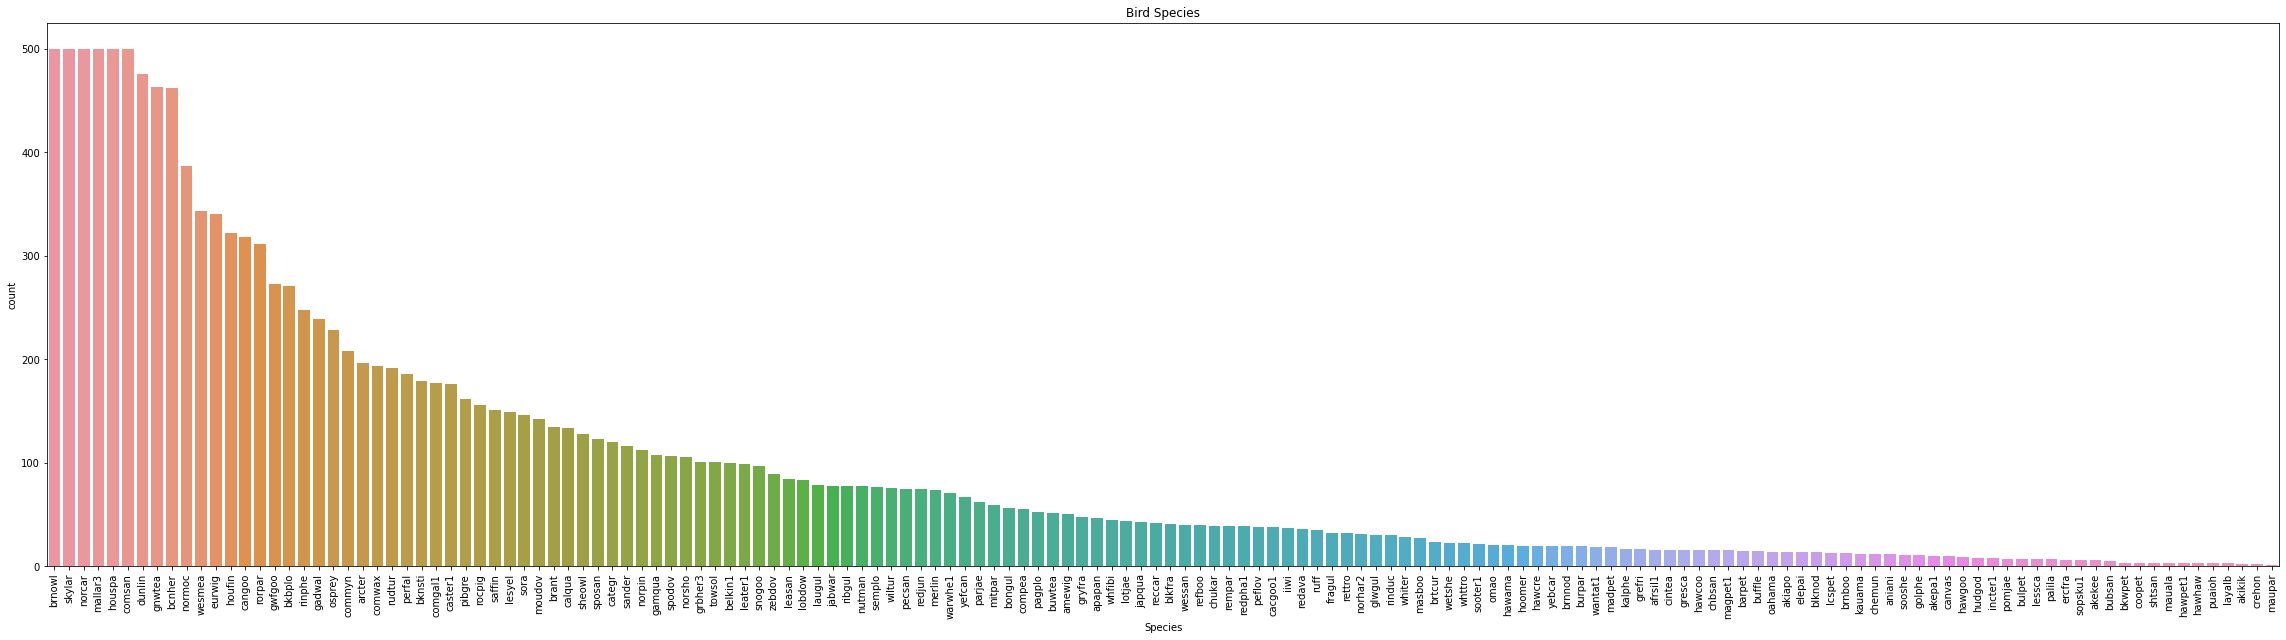

In [5]:
plt.figure(figsize=(40,10))
sns.countplot(x=train["primary_label"],
             order=train["primary_label"].value_counts().index)

plt.xticks(rotation=90)
plt.title('Bird Species')
plt.xlabel("Species");

In [6]:
train["primary_label"].unique()

array(['afrsil1', 'akekee', 'akepa1', 'akiapo', 'akikik', 'amewig',
       'aniani', 'apapan', 'arcter', 'barpet', 'bcnher', 'belkin1',
       'bkbplo', 'bknsti', 'bkwpet', 'blkfra', 'blknod', 'bongul',
       'brant', 'brnboo', 'brnnod', 'brnowl', 'brtcur', 'bubsan',
       'buffle', 'bulpet', 'burpar', 'buwtea', 'cacgoo1', 'calqua',
       'cangoo', 'canvas', 'caster1', 'categr', 'chbsan', 'chemun',
       'chukar', 'cintea', 'comgal1', 'commyn', 'compea', 'comsan',
       'comwax', 'coopet', 'crehon', 'dunlin', 'elepai', 'ercfra',
       'eurwig', 'fragul', 'gadwal', 'gamqua', 'glwgul', 'gnwtea',
       'golphe', 'grbher3', 'grefri', 'gresca', 'gryfra', 'gwfgoo',
       'hawama', 'hawcoo', 'hawcre', 'hawgoo', 'hawhaw', 'hawpet1',
       'hoomer', 'houfin', 'houspa', 'hudgod', 'iiwi', 'incter1',
       'jabwar', 'japqua', 'kalphe', 'kauama', 'laugul', 'layalb',
       'lcspet', 'leasan', 'leater1', 'lessca', 'lesyel', 'lobdow',
       'lotjae', 'madpet', 'magpet1', 'mallar3', 'masboo

## Destination

In [7]:
import plotly.express as px

fig = px.scatter_geo(
    train,
    lat="latitude",
    lon="longitude",
    color="common_name",
    width=1_000,
    height=500,
    title="Birds",
)
fig.show()

# <center> To be continuted</center>